# Predicción Precio Vehículos - Regresión Lineal

En el siguiente ejercicio se busca, a través del análisis de datos, generar un modelo que nos permita predecir el precio de un vehículo a partir de sus características principales, mediante la generación de un modelo de regresión lineal. Siguiendo las siguientes etapas del análisis:

1. __Descripción del problema:__ Define el objetivo del análisis y qué se espera lograr con el modelo predictivo.

2. __Análisis Exploratorio de Datos (EDA):__ Esta etapa es crucial para comprender los datos, identificar patrones, relaciones y posibles correlaciones. Ayuda a seleccionar las características adecuadas para el modelo.

3.  __Codificación de variables Categóricas:__ Los datos se preparan para el modelado, lo que implica convertir variables categóricas en numéricas utilizando técnicas como One-Hot Encoding.

4. __Análisis de Correlación:__ En esta etapa, se examinan las relaciones entre las diferentes características del conjunto de datos y la variable objetivo (en este caso, el precio del vehículo). Se calculan los coeficientes de correlación, como el coeficiente de correlación de Pearson, para medir la fuerza y la dirección de la relación entre las variables numéricas. Este análisis proporciona información crucial sobre qué características están más estrechamente relacionadas con el precio del vehículo y cuáles pueden tener una influencia significativa en el modelo de regresión lineal.

5. __Construcción del Modelo de regresión lineal:__ Se procede a entrenar el modelo de regresión lineal utilizando el conjunto de datos de entrenamiento, ajustando los parámetros óptimos para obtener la mejor predicción posible. Luego, se evalúa la capacidad predictiva del modelo utilizando métricas como el Error Cuadrático Medio (MSE) y el coeficiente de determinación R2. Finalmente, se valida el rendimiento del modelo en un conjunto de datos de prueba independiente para confirmar su capacidad para generalizar a nuevas instancias.








### Librerías

Las librerías que vamos a utilizar son:

In [5]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics


#Configuración Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Descripción del Problema
Tenemos un conjunto de datos que abarca características de los vehículos incluyendo el precio. Nuestro objetivo será, a través de un modelo de regresión lineal, predecir el valor de cada vehículo en función de sus características principales.

# 2. Análisis Exploratorio de Datos
A continuación realizamos un análisis exploratorio de datos. Esta etapa se centra en conocer en detalle tus datos, como descubrir patrones, detectar anomalías, generar y probar hipótesis, y verificar suposiciones con la ayuda de estadísticas descriptivas y representaciones gráficas para transformarlos en información útil.
## 2.1 Ingresamos los datos que vamos a utilizar"

In [6]:
# Leemos el archivo y lo guardamos en la variable df
df = pd.read_csv("Car details v3.csv")

## 2.2 Resumen de los datos

Por medio de resúmenes de datos empezamos a comprender los datos que vamos a trabajar durante el análisis.

In [7]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


La variable dependiente que será la que vamos a predecir será __selling_price__, las demás variables serán consideradas variables independientes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Podemos ver que las columnas *mileage, engine, max_power, torque, seats* presentan valores nulos.

## 2.3 Valores Faltantes

La gran mayoría de algoritmos de creación de modelos no acepta valores nulos, por lo que tenemos principalmente dos opciones:
- Eliminar las observaciones o variables que contengan valores nulos.
- Tratar de estimar los valores ausentes empleando la imputación de valores faltantes.

Vamos a observar la cantidad de valores faltantes por variable:

In [9]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Vamos a observar cuántos registros tienen al menos un dato nulo:

In [10]:
df[df.isnull().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


Vemos que hay $222$ registros que al menos tienen un dato nulo. Ahora vamos a hallar la proporción de registros con al menos un dato nulo con respecto al número total de registros.

In [11]:
# Proporción de registros con al menos un dato nulo
print(f" La proporción de Registros con al menos un valor nulo es {df[df.isnull().any(axis=1)].shape[0] / df.shape[0] * 100 :.4f}%" )

 La proporción de Registros con al menos un valor nulo es 2.7313%


La proporción de los registros que contienen valores nulos es relativamente baja, puesto que es aproximadamente de $2.73\%$.

En este caso, optamos por eliminar los registros que tengan al menos un dato nulo. Esto se debe a que el conjunto de datos es lo suficientemente grande y la proporción de datos nulos es muy baja. Además, debemos tener en cuenta que existe un alto riesgo de introducir valores en predictores que puedan tener mucha influencia en el modelo, lo que podría sesgar el modelo y, por ende, disminuir su precisión en la predicción.

In [12]:
# Eliminamos los registros que tengan al menos un dato nulo
df = df.dropna()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Observamos que ahora tenemos $7906$ Registros.

## 2.4 Transformación de Características

A continuación vamos a analizar algunas variables y las transformaciones en el conjunto de datos que puedan beneficiar el análisis y la posterior creación del modelo de regresión lineal:

- Campo *__name__*: Observamos que es del tipo *object*. Vamos a observar cuántos valores únicos hay, ya que si existe una alta cardinalidad en comparación con el tamaño del conjunto de datos, puede aumentar la complejidad del modelo sin agregar valor predictivo significativo. En este caso, eliminar el campo podría ayudar a reducir la dimensionalidad y mejorar el rendimiento del modelo.

In [13]:
df["name"].nunique()

1982

Tenemos un alto número de variables cualitativas únicas, por lo que podría aumentar considerablemente la complejidad del modelo sin agregar un valor predictivo realmente significativo. Por lo tanto, procedemos a eliminar ese campo

In [14]:
df.drop("name", axis= 1, inplace= True)
df.reset_index(drop= True, inplace= True)
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


- Campo *__mileage__*": Observamos que en este campo, los datos están representados como objetos (tipo *"object"*) debido a que contienen un número seguido de un texto (*"string"*). Es fundamental convertir este campo a un formato numérico para poder realizar un análisis adecuado. Sin embargo, antes de realizar la conversión, es importante tener en cuenta que podrían existir múltiples unidades de medida en este campo. Para abordar esta incertidumbre, vamos a crear una copia del DataFrame original. En esta copia, separaremos el número y el texto en dos columnas diferentes para examinar qué cadenas de caracteres están presentes en este campo.

In [15]:
# Creamos una copia del Dataframe
# ===============================================
df_copia = df.copy()

# Separamos el valor del string
# ===============================================
df_copia[["valor", "unidad"]] = df_copia["mileage"].str.split(" ", expand= True)

# Realizamos un conteo de las variables en la columna "unidad" Generada y mostramos el DataFrame
# ===============================================
print(df_copia["unidad"].value_counts())
df_copia[df_copia["unidad"] == "km/kg"]

unidad
kmpl     7819
km/kg      87
Name: count, dtype: int64


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,valor,unidad
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,17.3,km/kg
33,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,33.44,km/kg
86,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,26.2,km/kg
196,2016,360000,50000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,26.6,km/kg
388,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,20.88,km/kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,2010,155000,70000,CNG,Individual,Manual,Second Owner,26.83 km/kg,796 CC,38.4 bhp,62Nm@ 3000rpm,5.0,26.83,km/kg
7332,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,33.44,km/kg
7428,2012,300000,70000,LPG,Individual,Manual,First Owner,13.2 km/kg,995 CC,60.2 bhp,90.3Nm@ 4200rpm,5.0,13.2,km/kg
7517,2015,380000,20000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,21.94,km/kg


Podemos notar que los vehículos que tienen la unidad *"km/kg"* corresponden a aquellos que tienen en el campo *"fuel"* un valor de *"CNG"* o *"LPG"*. Esta asociación tiene sentido ya que los vehículos que utilizan Gas Licuado de Petróleo (LPG) o Gas Natural Comprimido (CNG) como combustible tienden a medir su eficiencia en *"km/kg"*. Dado que la unidad de medida está relacionada con los valores de la columna *"fuel"*, que nos indica el tipo de combustible, podemos optar por conservar únicamente el número en la columna *"mileage"* y ajustar el coeficiente según el tipo de combustible. Entonces procedemos a conservar solo los valores numéricos de la variable *mileage*, esto lo podemos lograr a través de expresiones regulares.

In [16]:
#Transformación del campo mileage
# ===========================================
df["mileage"] = df["mileage"].str.extract("(\d+\.\d+|\d+)").astype(np.float64)

- Campo *__engine__*: Sucede lo mismo que en el campo *mileage*, de forma que debemos eliminar la cadena de caracteres para obtener un campo numérico. Sin embargo, también vamos a explorar qué unidades de medida tiene el campo.

In [17]:
# Creamos una copia del Dataframe
# ===============================================
df_copia = df.copy()

# Separamos el valor del string
# ===============================================
df_copia[["valor", "unidad"]] = df_copia["engine"].str.split(" ", expand= True)

# Realizamos un conteo de las variables en la columna "unidad" Generada y mostramos el DataFrame
# ===============================================
print(df_copia["unidad"].value_counts())

unidad
CC    7906
Name: count, dtype: int64


En este caso, podemos notar que todos los datos tienen la misma unidad de medida, lo que nos permite eliminar la unidad de medida de los valores individuales. Dado que la unidad de medida es consistente para todo el campo, podemos optar por agregar la unidad de medida al encabezado *(header)* del campo para indicar claramente la unidad utilizada en todos los valores.

In [18]:
#Transformación del campo engine
# ===========================================
df["engine"] = df["engine"].str.extract("(\d+\.\d+|\d+)").astype(np.float64)

#Añadimos la unidad al titulo del campo
df.rename(columns= {"engine": "engine(CC)"}).head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine(CC),max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0


- Campo *__max_power__*: Realizamos el mismo proceso para observar si la unidad de medida es la misma para todos los registros.

In [19]:
# Creamos una copia del Dataframe
# ===============================================
df_copia = df.copy()

# Separamos el valor del string
# ===============================================
df_copia[["valor", "unidad"]] = df_copia["max_power"].str.split(" ", expand= True)

# Realizamos un conteo de las variables en la columna "unidad" Generada y mostramos el DataFrame
# ===============================================
print(df_copia["unidad"].value_counts())

unidad
bhp    7906
Name: count, dtype: int64


Observamos que todos los registros tienen la misma unidad de medida, así que vamos a conservar solo el valor numérico y vamos a añadir al encabezado la unidad de medida.

In [20]:
#Transformación del campo max_power
# ===========================================
df["max_power"] = df["max_power"].str.extract("(\d+\.\d+|\d+)").astype(np.float64)

#Añadimos la unidad al titulo del campo
df.rename(columns= {"max_power": "max_power(bhp)"}).head(2)
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

- Campo *__torque__*: Este campo presenta algunas dificultades debido a que no tiene un patrón claro, ya que algunos vehículos tienen el torque expresado en Newton-metro, otros en kilogramos-metro, y algunos no tienen indicadas las unidades en las que se encuentran presentadas. Realizamos un conteo de valores únicos en este campo.

In [21]:
df["torque"].nunique()

441

Tenemos un alto número de variables cualitativas únicas, por lo que podría aumentar considerablemente la complejidad del modelo sin agregar un valor predictivo realmente significativo. Además, es posible que la variable torque esté relacionada con la variable *max_power*, lo que podría generar colinealidad en nuestro modelo de regresión lineal. Por ello, procedemos a eliminar ese campo.

In [22]:
df.drop(["torque"], axis= 1, inplace= True)
df.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [23]:
df["selling_price"].describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

## 2.5 Valores Atípicos

A continuación vamos a crear las gráficas de caja para observar la distribución de las variables numéricas:

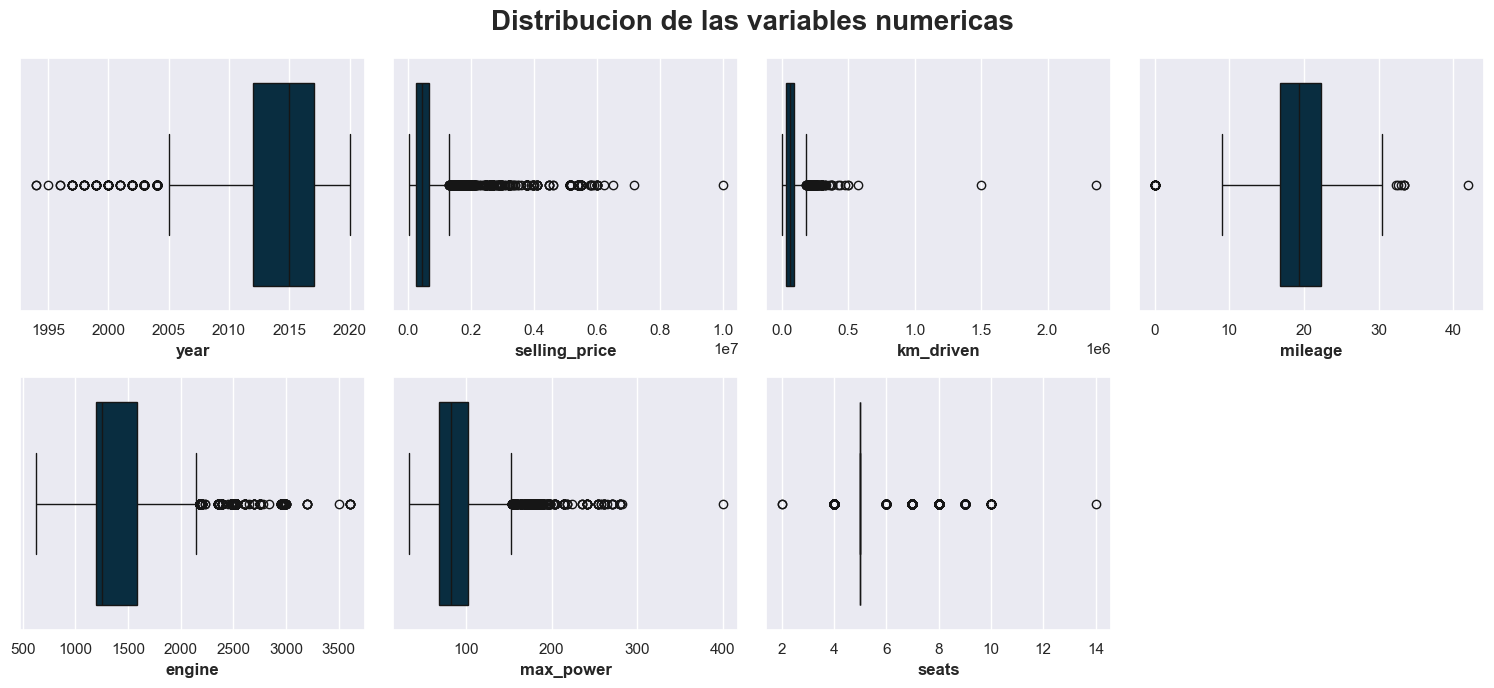

In [24]:
# Creamos la matriz de gráficas
# ======================================================
fig, axes = plt.subplots(2, 4, figsize=(15,7))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable
# ================================================================
caracteristicas = df.select_dtypes(include= [np.number]).columns
for i in range(len(df.select_dtypes(include= [np.number]).columns)):
    fila= i //4
    columna= i % 4
    sns.boxplot(data= df, x= caracteristicas[i], ax= axes[fila, columna])
    axes[fila, columna].set_xlabel(caracteristicas[i], fontweight= "bold")
fig.delaxes(ax= axes[1,3])
fig.suptitle("Distribucion de las variables numericas", fontweight= "bold", fontsize= 20)
fig.tight_layout()

La eliminación de observaciones atípicas e influyentes debe ser analizada minuciosamente, considerando la finalidad del modelo. Si el objetivo del modelo es predictivo, generalmente un modelo que no contenga outliers ni observaciones altamente influyentes tiende a predecir mejor la mayoría de los casos. Sin embargo, es crucial prestar atención a estos valores, ya que, si no son errores de medición, podrían representar casos especialmente interesantes. No es adecuado descartar una observación simplemente porque sea un valor atípico, ya que podría ser legítima. Es esencial investigar la naturaleza del valor atípico antes de decidir si debe ser excluido o no. Se permite eliminar valores atípicos en dos casos específicos:

- Cuando el valor atípico se debe a datos ingresados o medidos incorrectamente.
- Cuando el valor atípico genera una asociación significativa.

En el caso de la variable *"selling_price"*, podemos observar un valor extremo que se aleja completamente de la concentración del conjunto de datos, lo que podría generar una asociación significativa y una influencia desproporcionada en el modelo de regresión lineal. Además, en la variable *"km_driven"*, observamos dos valores que están muy alejados de la concentración de los datos, lo que podría tener un efecto similar. Aunque estos valores no son errores en los datos, su presencia puede afectar significativamente la capacidad del modelo para generalizar y hacer predicciones precisas.

In [25]:
# identificamos los valores extremos del campo selling_price y el campo km_driven
# ======================================================================
df[(df["selling_price"] > 0.99e7) | (df["km_driven"]> 1.4e6)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
164,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.00,4.0
1757,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1,2179.0,140.00,7.0
3377,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,5.0


In [26]:
# Capturamos los index de esas observaciones extremas
# ======================================================================
extremos_index = df[(df["selling_price"] > 0.99e7) | (df["km_driven"]> 1.4e6)].index

# Las eliminamos de nuestro DataFrame
# ======================================================================
df.drop(extremos_index, axis= 0, inplace= True)

# Mostramos las nuevas dimensiones del DataFrame y los primeros tres datos
# ======================================================================
print(f"Dimesiones del DataFrame: {df.shape}")
df.head(3)

Dimesiones del DataFrame: (7903, 11)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0


## 2.6 Análisis Univariable de Variables Numéricas

A continuación realizaremos un análisis univariable sobre cada una de las variables numéricas, por medio de resúmenes de datos y representaciones gráficas como histogramas.

In [27]:
# Resumen de datos cuantitativos
# ======================================
df.describe(include="number")

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7903.000000,7.903000e+03,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000
mean,2013.984689,6.486622e+05,68722.647982,19.417654,1458.586233,91.543458,5.416424
std,3.863416,8.069070e+05,47986.707753,4.028726,503.882245,35.580905,0.959081
min,1994.000000,2.999900e+04,1.000000,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,35000.000000,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,60000.000000,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,95100.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,7.200000e+06,577414.000000,33.440000,3604.000000,282.000000,14.000000


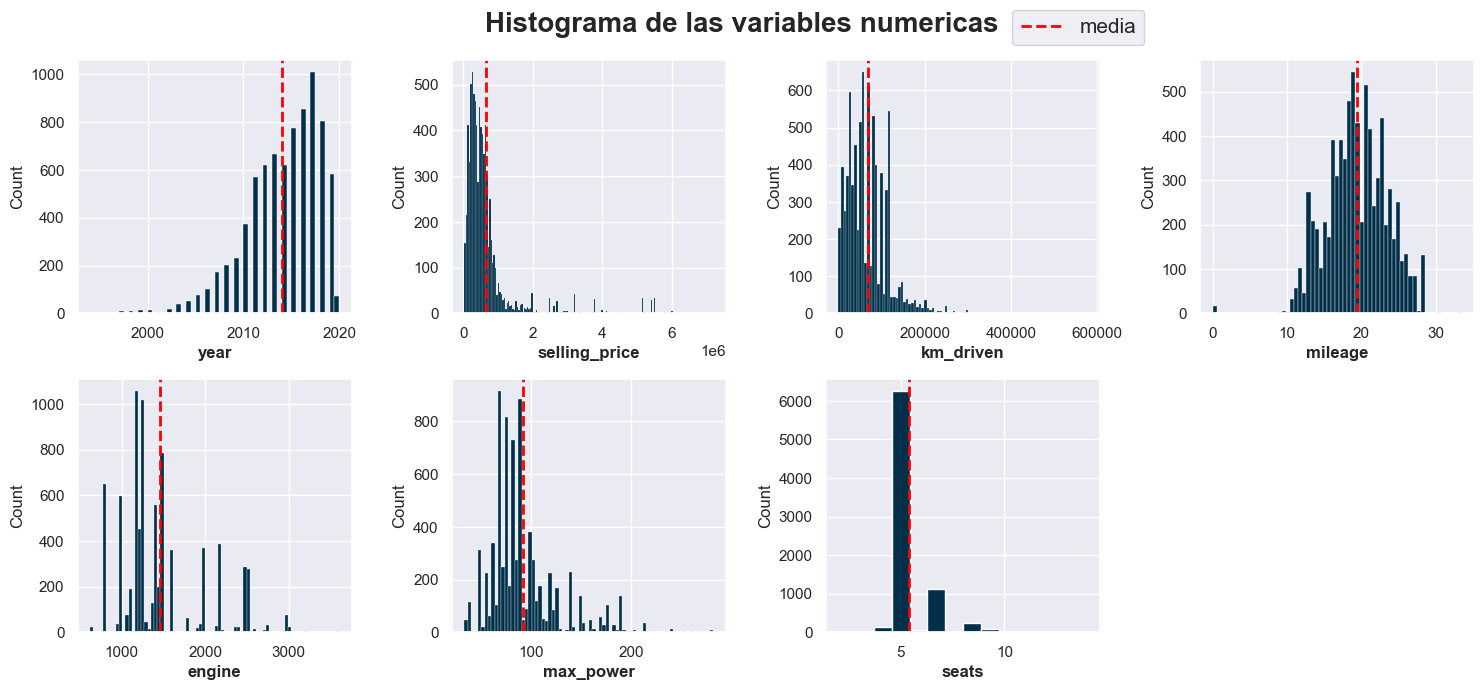

In [28]:
# Creamos la matriz de gráficas
# ======================================================
fig, axes = plt.subplots(2, 4, figsize=(15,7))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable
# ================================================================
caracteristicas = df.select_dtypes(include= [np.number]).columns
for i in range(len(caracteristicas)):
    fila= i //4
    columna= i % 4
    sns.histplot(data= df, x= caracteristicas[i], ax= axes[fila, columna], alpha= 1)
    axes[fila, columna].axvline(x= df[caracteristicas[i]].mean(), linewidth= 2, color= "red", linestyle= "dashed", label= "media")
    axes[fila, columna].set_xlabel(caracteristicas[i], fontweight= "bold")
fig.delaxes(ax= axes[1,3])
fig.suptitle("Histograma de las variables numericas", fontweight= "bold", fontsize= 20)
fig.tight_layout()
axes[0,2].legend(fontsize= 15, bbox_to_anchor= (1.2, 1.24));


Del análisis univariable se desprende lo siguiente:

- La mayoría de los vehículos en el conjunto de datos son modelos fabricados después del año 2010.

- Tanto la variable *selling_price* como la variable *km_driven* muestran distribuciones asimétricas positivas, lo que indica una cola hacia la derecha en la distribución.

- La variable *mileage* es la que más se asemeja a una distribución normal, seguida por la variable *max_power*.

- La variable *engine* tiene una distribución ligeramente sesgada hacia la izquierda.

- La gran mayoría de los vehículos en el conjunto de datos cuenta con 5 asientos.

## 2.7 Analisis Univariable de variables Categoricas
A continuacion realizaremos un analisis univariable sobre cada una de las variable numericas, por medio de resumenes de datos y representaciones graficas.

In [29]:
df.describe(include = "object")

,fuel,seller_type,transmission,owner
count,7903,7903,7903,7903
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4298,6560,6863,5213


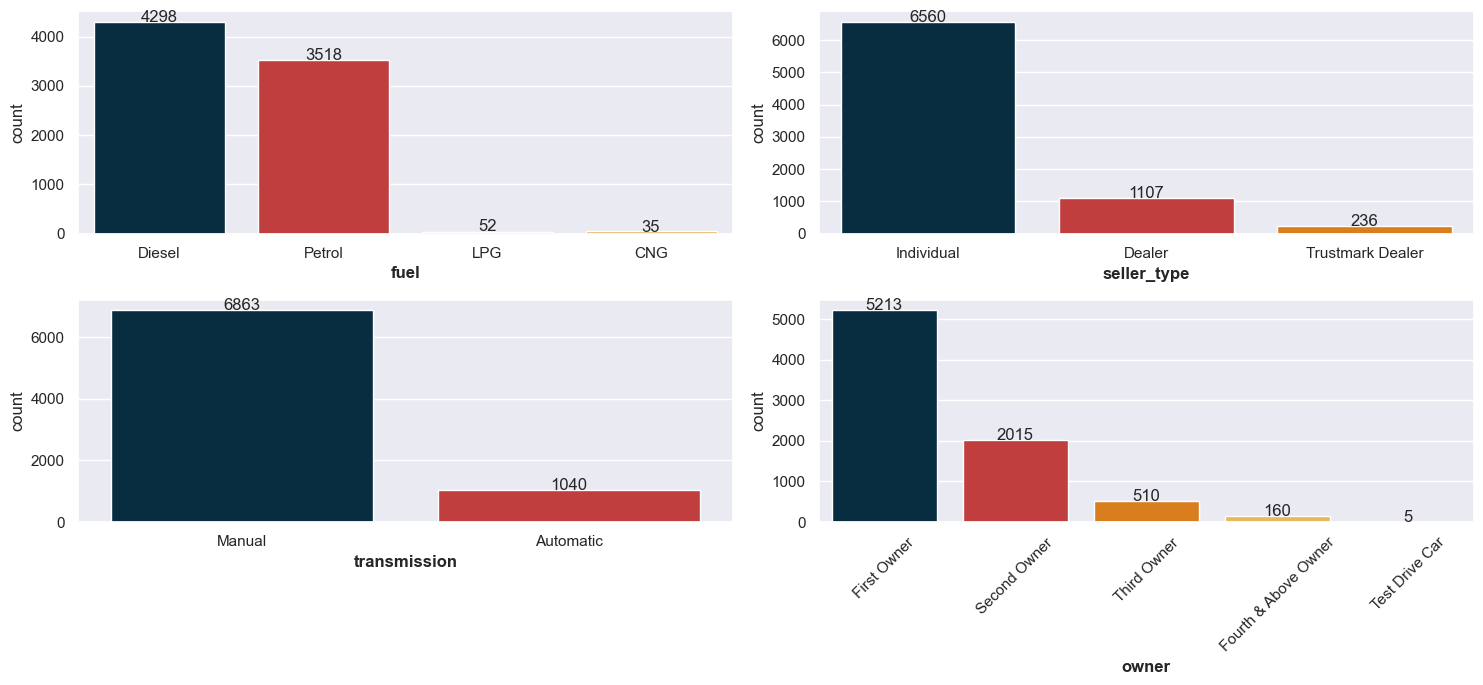

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable
# ================================================================
caracteristicas = df.select_dtypes(include= "object").columns
for i in range(len(caracteristicas)):
    fila= i //2
    columna= i % 2
    sns.countplot(data= df, x= caracteristicas[i], ax= axes[fila, columna], alpha= 1, palette= palette)
    axes[fila, columna].set_xlabel(caracteristicas[i], fontweight= "bold")
    for bar, value in enumerate(df[caracteristicas[i]].value_counts().reset_index()["count"].values):
        axes[fila, columna].text(bar, value, str(value), ha= "center")
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
fig.tight_layout()

- La mayoría de los vehículos en el conjunto de datos funcionan con combustible *Diesel*, seguidos por aquellos que utilizan gasolina, mientras que hay muy pocos vehículos que utilizan *LPG* y *CNG* como tipo de combustible.

- En cuanto a la variable *seller_type*, predominan los vendedores *individuales*, seguidos por los *concesionarios*, con una presencia mínima de vendedores *Trustmark Dealer*.

- Analizando la variable *transmission*, se observa que la mayoría de los vehículos en el conjunto de datos tienen transmisión manual.

- En lo que respecta a la variable *owner*, la mayoría de los vehículos son de primer propietario, seguidos por los de segundo propietario. Hay una diferencia considerable en el número de observaciones para los propietarios de tercer y cuarto (y superiores) propietarios. Además, solo hay 5 observaciones para vehículos de prueba (*Test Drive car*).

## 2.8 Análisis Bivariado - Variables Numéricas

A continuación, llevaremos a cabo un análisis bivariado para explorar las relaciones que puedan existir entre cada variable dependiente y las variables numéricas independientes. Esto nos permitirá entender mejor la interacción entre las diferentes variables en nuestro conjunto de datos.

In [31]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0


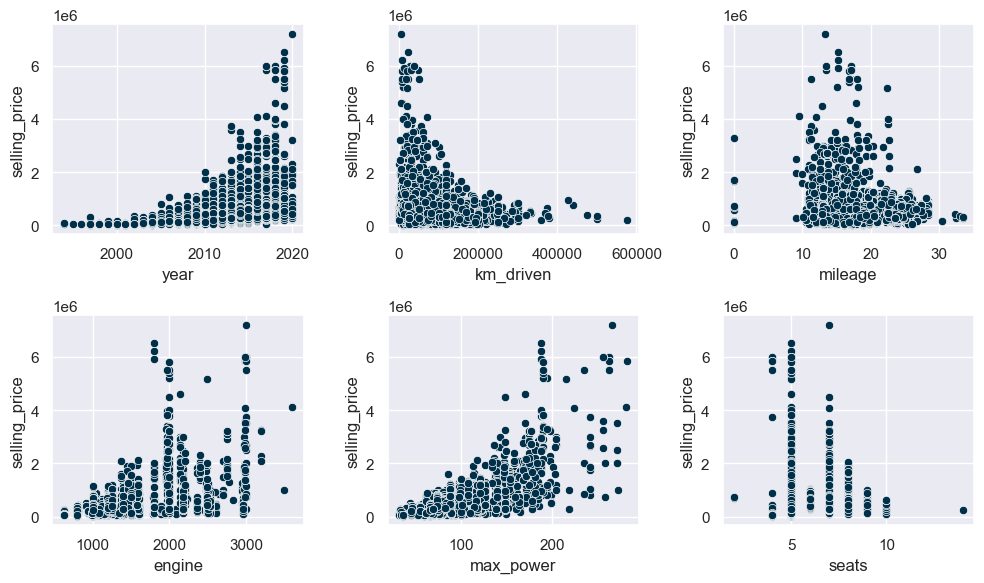

In [32]:
# Creamos una matriz de gráficos de 2 filas y 3 columnas
# ==============================================================
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (10, 6))

caracteristicas = df.select_dtypes(include= [np.number]).drop("selling_price", axis=1).columns

for i in range(len(caracteristicas)):
    fila = i // 3
    columna =  i % 3
    sns.scatterplot(ax= axes[fila, columna], data= df, x= caracteristicas[i], y= "selling_price")
fig.tight_layout()

- Se observa una relación débil positiva entre la variable *selling_price* y el año del vehículo, indicando que a medida que el modelo es más reciente, su valor tiende a ser mayor.

- Se evidencia una relación débil negativa entre la variable *km_driven* y la variable *selling_price*. Esto sugiere que a medida que aumenta la cantidad de kilómetros conducidos, el precio del vehículo tiende a disminuir. Sin embargo, esta relación parece ser muy tenue.

- No se aprecia ninguna relación entre la variable *selling_price* y la variable *mileage*.

- Existe una relación débil positiva entre la variable *selling_price* y la variable *engine*, lo que implica que a medida que aumenta el tamaño del motor, también lo hace el precio del vehículo.

- Se observa un patrón similar entre la variable *selling_price* y la variable *max_power*, donde a mayor potencia del vehículo, mayor es su valor.

- No parece haber una relación entre la cantidad de asientos y el valor del vehículo.

## Análisis Bivariado - Variables Categóricas

A continuación se realiza un análisis entre la variable *selling_price* y las variables categóricas.

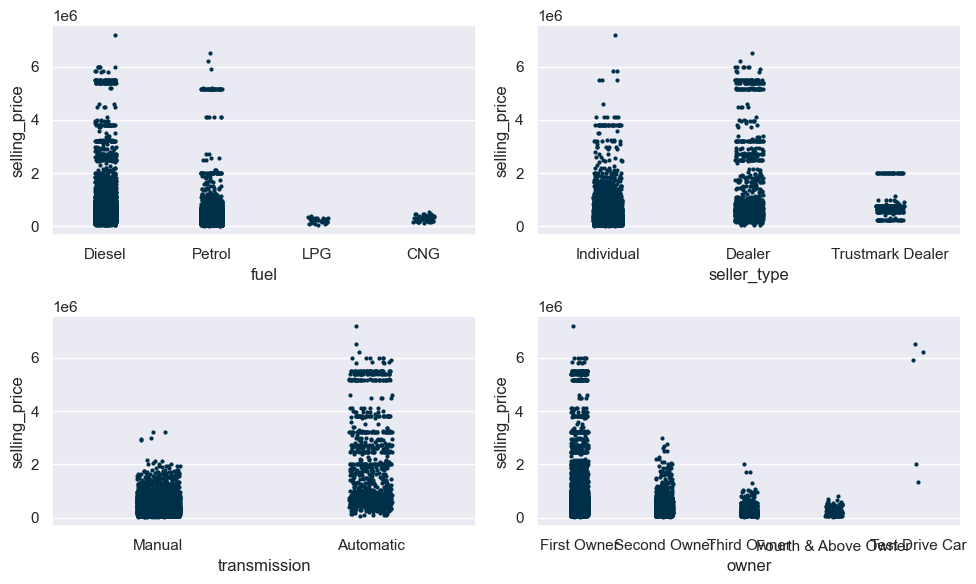

In [33]:
# Creamos una matriz de gráficos de 2 filas y 3 columnas
# ==============================================================
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (10, 6))

caracteristicas = df.select_dtypes(include= "object").columns

for i in range(len(caracteristicas)):
    fila = i // 2
    columna =  i % 2
    sns.stripplot(ax= axes[fila, columna], data= df, x= caracteristicas[i], y= "selling_price", s= 3)
fig.tight_layout()

- Los precios de los vehículos con tipo de combustible gasolina y Diesel son similares, mientras que los de tipo *LPG* y *CNG* son considerablemente más bajos.

- Los precios de los vehículos vendidos por Distribuidor son ligeramente más altos que los de tipo individual, mientras que los vehículos vendidos por Trustmark Dealer tienen precios significativamente más bajos.

- Los vehículos con transmisión automática tienen precios considerablemente más altos que aquellos con transmisión manual.

- A medida que aumenta el número de propietarios que ha tenido el vehículo, su precio tiende a disminuir. Sin embargo, los vehículos de prueba (*Test Drive*) incluyen algunos modelos costosos.

## Análisis Multivariado

A continuación se analizan múltiples variables simultáneamente para identificar relaciones y dependencias entre ellas.

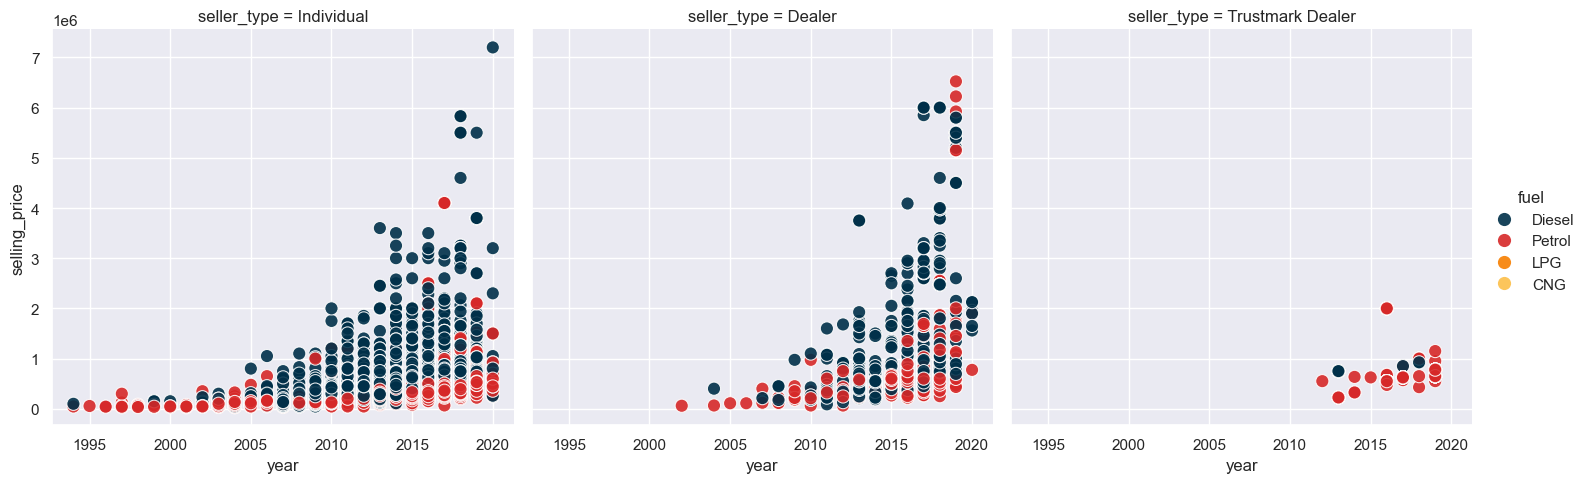

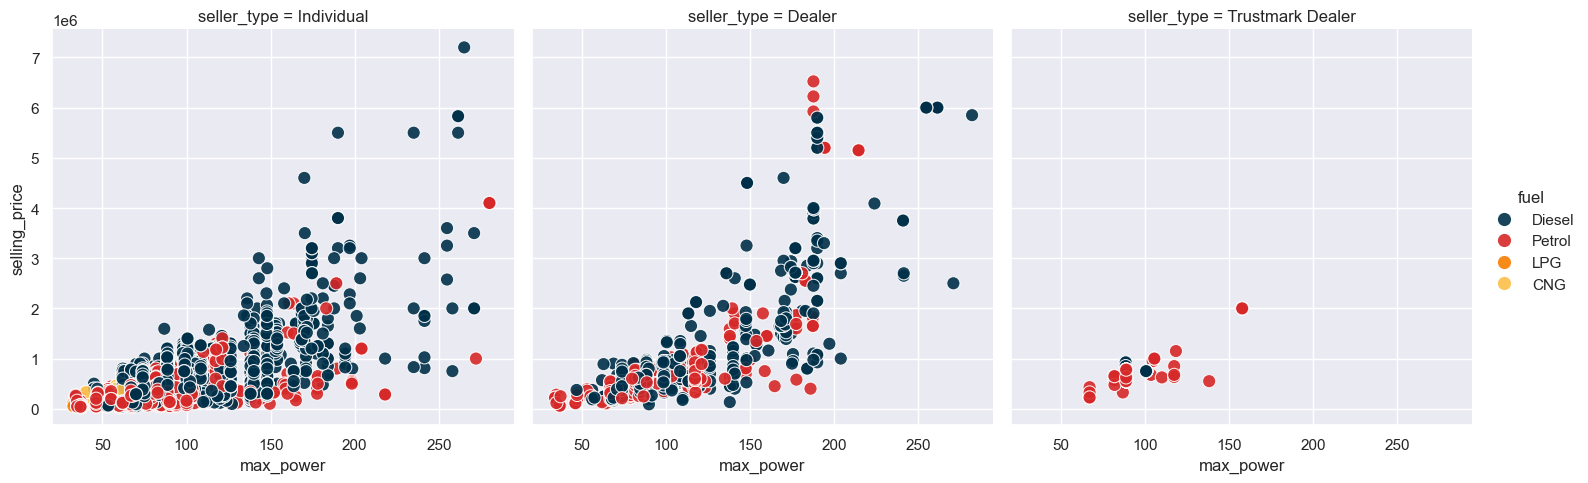

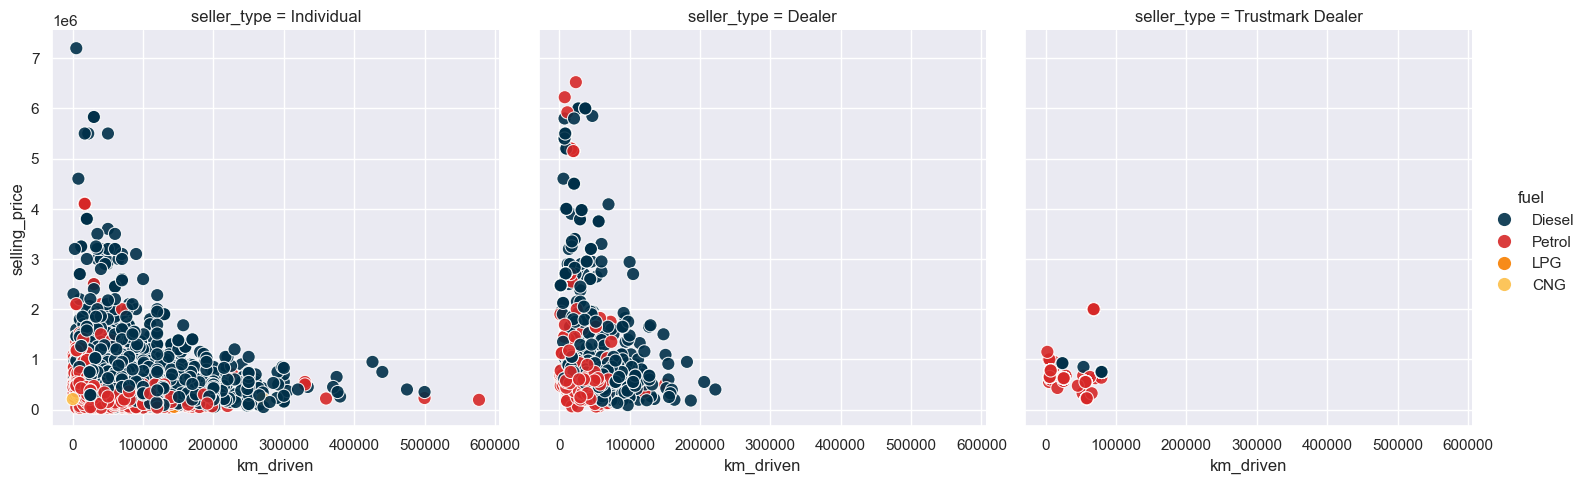

In [34]:
sns.relplot(data= df, x= "year", y= "selling_price", col= "seller_type", hue= "fuel", kind= "scatter", alpha= 0.9, s=90)
sns.relplot(data= df, x= "max_power", y= "selling_price", col= "seller_type", hue= "fuel", kind= "scatter", alpha= 0.9, s=90)
sns.relplot(data= df, x= "km_driven", y= "selling_price", col= "seller_type", hue= "fuel", kind= "scatter", alpha= 0.9, s=90);

- Aunque los vendedores de tipo *Trustmark Dealer* ofrecen modelos más recientes *(posteriores al año 2010)* y los que menos kilometraje tienen, estos vehículos suelen tener una potencia más baja. Por lo tanto, es evidente que el precio de venta de estos vehículos es relativamente bajo en comparación con los vendidos por Distribuidores o de forma individual

# 3. Codificación de Variables Categóricas

Se realiza un mapeo numérico de las variables cualitativas, mediante la librería de *pandas*.

In [35]:
caracteristicas = df.select_dtypes(include= "object").drop("fuel", axis=1).columns
caracteristicas
df = pd.get_dummies(df, columns= caracteristicas, drop_first= True)

df = pd.get_dummies(df, columns = ["fuel"]).drop("fuel_Diesel", axis = 1)*1

df.head(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_LPG,fuel_Petrol
0,2014,450000,145500,23.40,1248.0,74.00,5.0,1,0,1,0,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,1,0,1,0,1,0,0,0,0,0


## 4. Análisis de Correlación

Es fundamental calcular el coeficiente de correlación de Pearson. Este es un paso importante para identificar las variables que más influyen en el modelo.

<Axes: >

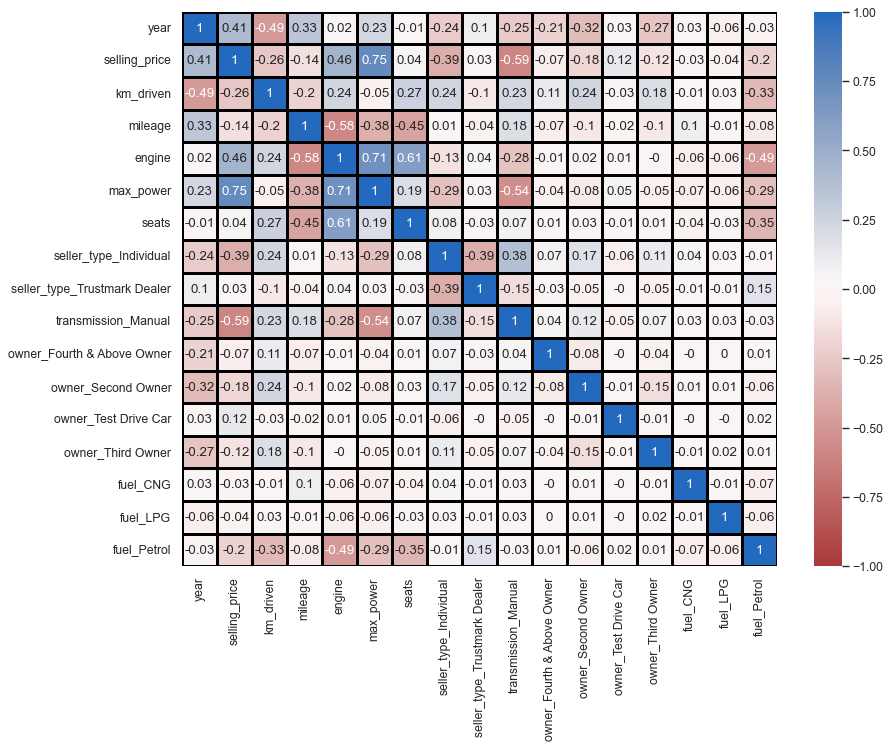

In [36]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (12, 9), dpi= 80)
sns.heatmap(data = round(df.corr(numeric_only= True, method= "pearson"),2),
            annot= True,
            vmin=-1, vmax=1,
            cmap= sns.color_palette("vlag_r", as_cmap=True),
            linecolor= "black",
            linewidth=1
            )

- Se observa que la variable *selling_price* presenta una relación lineal positiva fuerte con *max_power*. Además, muestra una correlación negativa media con la variable *transmission_manual*, una relación positiva media con la variable *engine*, una relación positiva media con la variable *year*, y una relación positiva con la variable *seller_type_individual*.

- Se evidencia una alta correlación entre las variables *engine* y *max_power*, lo que podría indicar la presencia de multicolinealidad entre ellas

# 5. Construcción del modelo de regresión lineal
## 5.1 Conjunto de variables independientes y la variable dependiente
A continuación, es necesario definir qué variables formarán parte del conjunto de características y cuál será la variable dependiente.

In [37]:
X = df.drop("selling_price", axis= 1)
y = df["selling_price"].values.reshape(-1, 1)

## 5.2 Dividimos nuestro conjunto en datos de entrenamiento y test
Ahora procederemos a dividir nuestro conjunto de datos en datos de entrenamiento, que serán utilizados para alimentar el modelo durante su proceso de entrenamiento, y datos de prueba, que servirán para evaluar la precisión y el rendimiento del modelo. Utilizaremos una proporción del $75\%$ para los datos de entrenamiento y el $25\%$ restante para los datos de prueba."ara evaluar la precisión y el rendimiento del modelo. Utilizaremos una proporcion de $75\%$ para los datos de entrenamiento y el $25\%$ restante para los datos de prueba

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1234, shuffle= True)
print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (5927, 16)
Dimensiones del X_test: (1976, 16)
Dimensiones del y_train : (5927, 1)
Dimensiones del y_test: (1976, 1)


## 5.3 Escalamos nuestro conjunto de características
La estandarización con el mismo escalador para ambos conjuntos de características, de entrenamiento y prueba, es crucial por varias razones. Primero, garantiza la consistencia en la transformación de las características, asegurando que todas estén en la misma escala. Esto es esencial para mantener la integridad de las relaciones entre las características y evitar sesgos en el modelo.

In [39]:
escalador = StandardScaler()

X_train_escaled = escalador.fit_transform(X_train)
X_test_escaled = escalador.transform(X_test)

## 5.4 Entrenamos el modelo

In [40]:
X_train_model = sm.add_constant(data= X_train_escaled, prepend= True)
modelo_reg = sm.OLS(endog= y_train, exog= X_train_model)
modelo_reg = modelo_reg.fit()
print(modelo_reg.summary(xname=["intercept", *X.columns], yname= "selling_price"))

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     823.7
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        08:42:59   Log-Likelihood:                -85529.
No. Observations:                5927   AIC:                         1.711e+05
Df Residuals:                    5910   BIC:                         1.712e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept       

- El coeficiente de determinación \( R^2 \) es de 0.690, lo que indica que el modelo es capaz de explicar el 69% de la variabilidad de la variable dependiente mediante las variables incluidas en el modelo. El \(R^2\) ajustado, que se refiere al coeficiente de determinación ajustado al número de variables independientes, en este caso es el mismo valor.

- El estadístico F se utiliza para evaluar la significancia general del modelo. En este caso, el valor F es 823.7, con un valor p asociado *(Prob(F-statistic))* muy cercano a cero, lo que indica que el modelo en general es significativo. Esto implica que al menos un predictor contribuye al modelo de manera significativa.

- Cada coeficiente representa el cambio esperado en la variable dependiente *(selling_price)* por un cambio de una unidad en la variable independiente correspondiente, manteniendo todas las demás variables constantes. Por ejemplo, el coeficiente para *year* es $1.116e+05$, lo que indica que, en promedio, por cada año adicional del vehículo, el precio de venta aumenta en aproximadamente 116,050 unidades.

- \( P>|t| \): Estos valores son los valores p asociados a las pruebas t individuales para cada coeficiente del modelo. Indican si cada coeficiente es significativamente diferente de cero. Por ejemplo, para el coeficiente de "year", el valor p es prácticamente cero, lo que indica que es altamente significativo. Por otra parte, por ejemplo, la variable "owner_Third Owner" tiene un valor p mayor al nivel de significancia (generalmente 0.05), lo que sugiere que esa variable no es significativa para el modelo. Se podría eliminar sin afectar la precisión del modelo en su conjunto.

- El Omnibus, Durbin-Watson, Jarque-Bera, Skew y Kurtosis son estadísticas de diagnóstico para evaluar la validez de los supuestos del modelo. En este caso, se observa que el modelo no cumple totalmente con todas las suposiciones de la regresión lineal, ya que hay signos de problemas de distribución de errores y autocorrelación. Por lo tanto, se debe considerar cuidadosamente las suposiciones del modelo.

## Métricas de Ajuste de Bondad

A continuación hallaremos las métricas de ajuste de bondad del modelo MSE, RMSE, MAE, y el Coeficiente de Determinación \(R^2\) de los datos de prueba.

In [41]:
# Hallamos los valores de y_test
X_test_model = sm.add_constant(data= X_test_escaled, prepend= True)

# Calculamos las predicciones del modelo creado
predicciones_y_test = modelo_reg.predict(exog= X_test_model)

In [42]:
# Creamos una función donde Hallamos todas las métricas de bondad de ajuste del modelo y lo llamamos
# ==============================================================================
def metricas (y_test: list, predicciones_y_test: list) -> pd.DataFrame:

    r2_score = metrics.r2_score(y_true = y_test, y_pred= predicciones_y_test)
    mse = metrics.mean_squared_error(y_true= y_test, y_pred= predicciones_y_test, squared= True)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_true= y_test, y_pred= predicciones_y_test)
    m = metrics.max_error(y_true= y_test, y_pred= predicciones_y_test)

    # Mostramos un DataFrame donde colocamos lso datos para ese modelo de regresion
    return pd.DataFrame([r2_score, mse, rmse, mae, m], index= ["R2_score", "MSE", "RMSE", "MAE", "M"], columns= ["Modelo_reg"])

metricas(y_test, predicciones_y_test)

,Modelo_reg
R2_score,6.734570e-01
MSE,2.166377e+11
RMSE,4.654436e+05
MAE,2.837297e+05
M,3.674468e+06


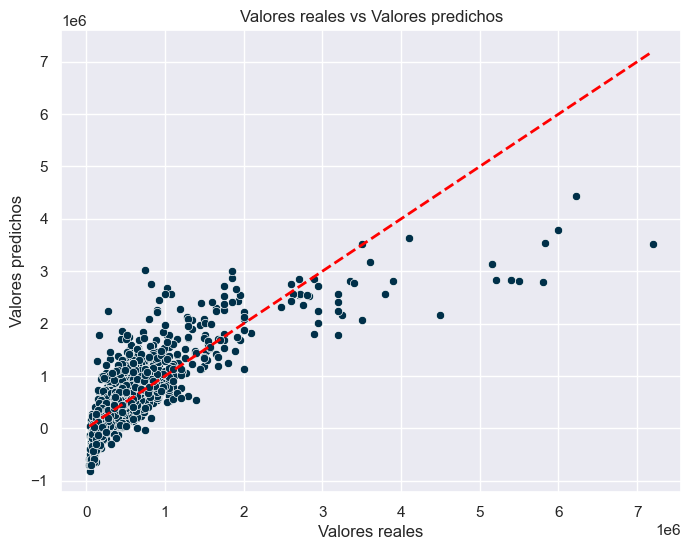

In [43]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (8, 6))
sns.scatterplot(ax= axes, x=y_test.reshape(-1), y= predicciones_y_test)
axes.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= "red", linewidth= 2, linestyle= "dashed")
axes.set_xlabel("Valores reales")
axes.set_ylabel("Valores predichos")
axes.set_title("Valores reales vs Valores predichos");

Aunque el modelo de regresión lineal utilizado exhibe un coeficiente de determinación \(R^2\) de 0.69, lo que indica que el modelo puede explicar el 69% de la variabilidad de la variable dependiente a través del conjunto de características, existe la posibilidad de explorar otros modelos que potencialmente puedan explicar un porcentaje mayor de esta variabilidad. La implementación de modelos como la regresión polinómica, regresión Ridge o Lasso, entre otros, podría ofrecer una mayor precisión en las predicciones, lo que supondría una mejora en la capacidad de explicación del fenómeno estudiado.

## Referencias Bibliográficas:
- Hernández-Sampieri, R., Fernández-Collado, C., & Baptista-Lucio, P. (2006). Analisis de los datos cuantitativos. Metodología de la investigación, 6, 270-335.
- Abuín, J. R. (2007). Regresión lineal múltiple. IdEyGdM-Ld Estadística, Editor, 32
- Laguna, C. (2014). Correlación y regresión lineal. Instituto Aragonés de Ciencias de la Salud, 4, 1-18.
- Garriga Trillo, A. J. (2009). Introducción al análisis de datos. UNED - Universidad Nacional de Educación a Distancia. 
- Minguillón, J. Casas, J. y Minguillón, J. (2017). Minería de datos: modelos y algoritmos. Editorial UOC.
